# Data Importing

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from  matplotlib.pyplot import plot
import statsmodels as sm
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima_model import ARIMA
#import six
#import joblib
#import sys
#sys.modules['sklearn.externals.six'] = six
#sys.modules['sklearn.externals.joblib'] = joblib
#from statsmodels.tsa.statespace.sarimax import SARIMAX
#from pmdarima.arima import auto_arima
#from pmdarima.arima import OCSBTest
#from statsmodels.tsa.arima_model import ARIMA
#from arch import arch_model
#import warnings
#warnings.filterwarnings("ignore")

In [3]:
# importing benchmark interest rate dataset 
Bch_int = pd.read_excel("/Users/BENEL ENERGY/Documents/Benchmark interest rates.xlsx",index_col='Date', parse_dates=True)
# data point difference is from Bch_int missing oct.14 2019 and nov. 11 2019


Bch_int = Bch_int[[ '2 Yr','3 Yr', '5 Yr', '7 Yr', '10 Yr', '30 Yr']]
Bch_int

,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr
Date,,,,,,
2019-10-01,1.56,1.51,1.51,1.59,1.65,2.11
2019-10-02,1.48,1.43,1.43,1.53,1.60,2.09
2019-10-03,1.39,1.34,1.34,1.45,1.54,2.04
2019-10-04,1.40,1.35,1.34,1.43,1.52,2.01
2019-10-07,1.46,1.41,1.38,1.47,1.56,2.05
2019-10-08,1.42,1.38,1.36,1.45,1.54,2.04
2019-10-09,1.47,1.43,1.40,1.50,1.59,2.08
2019-10-10,1.53,1.49,1.48,1.57,1.67,2.16
2019-10-11,1.63,1.60,1.59,1.68,1.76,2.22


# Data Processing and Data Summary

### Averages 

In [9]:
# average yield for each benchmark for the month of october
avr_oct_ben = Bch_int[Bch_int.index < '2019-11-01'][['2 Yr','3 Yr', '5 Yr', '7 Yr', '10 Yr', '30 Yr']].mean()
print("The average yield of each Benchmark for the month of October: \n",avr_oct_ben)

The average yield of each Benchmark for the month of October: 
 2 Yr     1.551364
3 Yr     1.528182
5 Yr     1.525000
7 Yr     1.615000
10 Yr    1.706818
30 Yr    2.190455
dtype: float64


In [10]:
# average yield for each benchmark for the month of november 
avr_nov_ben = Bch_int[Bch_int.index > '2019-10-31'][['2 Yr','3 Yr', '5 Yr', '7 Yr', '10 Yr', '30 Yr']].mean()
print("The average yield of each Benchmark for the month of November: \n",avr_nov_ben)

The average yield of each Benchmark for the month of November: 
 2 Yr     1.612632
3 Yr     1.612105
5 Yr     1.639474
7 Yr     1.735789
10 Yr    1.812105
30 Yr    2.280526
dtype: float64


### Standard Deviation 

In [15]:
# Standard Deviation of the yield for each benchmark for the month of october 2019
std_oct_ben = Bch_int[Bch_int.index < '2019-11-01'].std()
print("The Standard Deviation of the yield of each Benchmark for the month of October: \n",std_oct_ben)

The Standard Deviation of the yield of each Benchmark for the month of October: 
 2 Yr     0.080315
3 Yr     0.096443
5 Yr     0.104460
7 Yr     0.100653
10 Yr    0.104808
30 Yr    0.101300
dtype: float64


In [16]:
# Standard Deviation of the yield for each benchmark for the month of november 2019
std_nov_ben = Bch_int[Bch_int.index > '2019-10-31'].std()
print("The Standard Deviation of the yield of each Benchmark for the month of November: \n",std_nov_ben)

The Standard Deviation of the yield of each Benchmark for the month of November: 
 2 Yr     0.033804
3 Yr     0.044043
5 Yr     0.052755
7 Yr     0.061039
10 Yr    0.065028
30 Yr    0.076918
dtype: float64


# No. 4:  Graphs

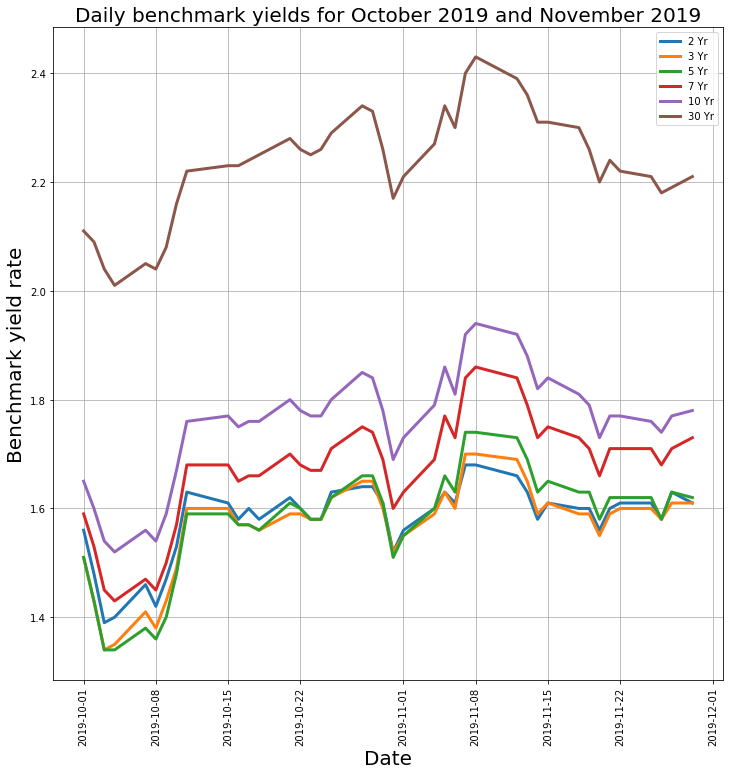

In [21]:
# Graph for the benchmark 
#Date = Bch_int['Date']
B1 = Bch_int['2 Yr']
B2 = Bch_int['3 Yr']
B3 = Bch_int['5 Yr']
B4 = Bch_int['7 Yr']
B5 = Bch_int['10 Yr']
B6 = Bch_int['30 Yr']

plt.figure(figsize = (12, 12))
                      
plt.plot( B1, label = "2 Yr", linewidth = 3)
plt.plot(B2, label = "3 Yr", linewidth = 3)
plt.plot( B3, label = "5 Yr", linewidth = 3)
plt.plot(B4, label = "7 Yr", linewidth = 3)
plt.plot( B5, label = "10 Yr", linewidth = 3)
plt.plot( B6, label = "30 Yr", linewidth = 3)

plt.grid()

plt.legend()
plt. xticks(rotation = 90, fontsize = 10)
plt. xticks(fontsize = 10)

plt.xlabel('Date', fontsize = 20)
plt.ylabel('Benchmark yield rate', fontsize = 20)
plt.title("Daily benchmark yields for October 2019 and November 2019", fontsize = 20)

plt.show()


In [40]:
G1['2019-10-02']

141.259995

##  Fitting the yield curve



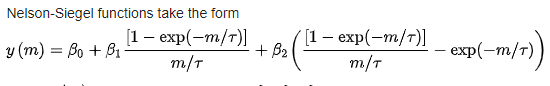


##### y(m) is the yield of the curve at maturity (m) and β_0,β_1,β_2 and τ, are parameters to be fitted via a least-squares or similar algorithm




In [124]:
from nelson_siegel_svensson import NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

### Fit the yield curve using the Benchmark October 2019 dataset

NelsonSiegelCurve(beta0=2.447400310293503, beta1=-0.7216412737832328, beta2=-1.814041784994876, tau=4.018363526335252)
NelsonSiegelCurve(beta0=2.425070567644402, beta1=-0.7455725772204956, beta2=-1.97791295740259, tau=3.7131105400779236)
NelsonSiegelCurve(beta0=2.3594269868445448, beta1=-0.7135482459457786, beta2=-2.1552845085608276, tau=3.357692357111284)
NelsonSiegelCurve(beta0=2.3392420275917134, beta1=-0.6903354980072791, beta2=-2.1184448616954485, tau=3.531208082003229)
NelsonSiegelCurve(beta0=2.380421671231391, beta1=-0.6371583041460834, beta2=-2.2077447238053094, tau=3.49637557653796)
NelsonSiegelCurve(beta0=2.3889677572415335, beta1=-0.7348077802807381, beta2=-2.1117817890803963, tau=3.691854362301346)
NelsonSiegelCurve(beta0=2.408253404680627, beta1=-0.6703741432045658, beta2=-2.1616523491886404, tau=3.488855917883578)
NelsonSiegelCurve(beta0=2.489809531221557, beta1=-0.717115586043317, beta2=-2.1047036242012593, tau=3.517591401092311)
NelsonSiegelCurve(beta0=2.541362799816001

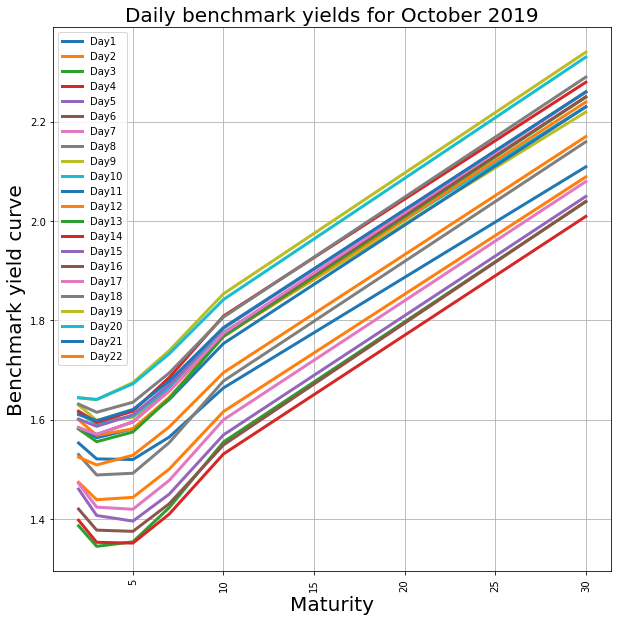

In [205]:
#fit yield curve for october
t = np.array([2, 3, 5, 7, 10, 30])
d = []
for i in range(0, len(Bch_int['2 Yr'])):
    if i < 23:
        y = Bch_int.values[i]
        curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 1.0 for the optimization of tau
        assert status.success
        d.append(curve(t))
        print(curve)
d = pd.Series(d) 
plt.figure(figsize = (10, 10))
                      
plt.plot(t, d[0] , label = 'Day1', linewidth = 3)
plt.plot(t, d[1] , label = 'Day2', linewidth = 3)
plt.plot(t, d[2] , label = 'Day3', linewidth = 3)
plt.plot(t, d[3] , label = 'Day4', linewidth = 3)
plt.plot(t, d[4] , label = 'Day5', linewidth = 3)
plt.plot(t, d[5] , label = 'Day6', linewidth = 3)
plt.plot(t, d[6] , label = 'Day7', linewidth = 3)
plt.plot(t, d[7] , label = 'Day8', linewidth = 3)
plt.plot(t, d[8] , label = 'Day9', linewidth = 3)
plt.plot(t, d[9] , label = 'Day10', linewidth = 3)
plt.plot(t, d[10] , label = 'Day11', linewidth = 3)
plt.plot(t, d[11] , label = 'Day12', linewidth = 3)
plt.plot(t, d[12] , label = 'Day13', linewidth = 3)
plt.plot(t, d[13] , label = 'Day14', linewidth = 3)
plt.plot(t, d[14] , label = 'Day15', linewidth = 3)
plt.plot(t, d[15] , label = 'Day16', linewidth = 3)
plt.plot(t, d[16] , label = 'Day17', linewidth = 3)
plt.plot(t, d[17] , label = 'Day18', linewidth = 3)
plt.plot(t, d[18] , label = 'Day19', linewidth = 3)
plt.plot(t, d[19] , label = 'Day20', linewidth = 3)
plt.plot(t, d[20] , label = 'Day21', linewidth = 3)
plt.plot(t, d[21] , label = 'Day22', linewidth = 3)


plt.grid()

plt.legend()
plt. xticks(rotation = 90, fontsize = 10)
plt. xticks(fontsize = 10)

plt.xlabel('Maturity', fontsize = 20)
plt.ylabel('Benchmark yield curve', fontsize = 20)
plt.title("Daily benchmark yield curve for October 2019", fontsize = 20)

plt.show()



### Fit the yield curve using the Benchmark November 2019 dataset

NelsonSiegelCurve(beta0=2.6152144401156576, beta1=-0.8832886543073413, beta2=-1.764147923703768, tau=3.926823673628627)
NelsonSiegelCurve(beta0=2.6829260026638067, beta1=-0.9812643705759396, beta2=-1.5676638917205545, tau=4.057556695624076)
NelsonSiegelCurve(beta0=2.6754728276638815, beta1=-1.0012693445162768, beta2=-1.5718206293999437, tau=4.41110512868884)
NelsonSiegelCurve(beta0=2.837113043473999, beta1=-1.1725388321465142, beta2=-1.2224780621605238, tau=5.575323435184606)
NelsonSiegelCurve(beta0=2.826114335842105, beta1=-1.1522496527098371, beta2=-1.2920491468964046, tau=4.91473147199907)
NelsonSiegelCurve(beta0=2.806025820995155, beta1=-1.1742158977215116, beta2=-1.1271930927479081, tau=5.514908288870752)
NelsonSiegelCurve(beta0=2.7590603493736743, beta1=-1.1274156054636573, beta2=-1.3008059599524093, tau=4.985426533888801)
NelsonSiegelCurve(beta0=2.7048260871302516, beta1=-1.1050361805309032, beta2=-1.4073715770498902, tau=4.758725295324055)
NelsonSiegelCurve(beta0=2.656432513556

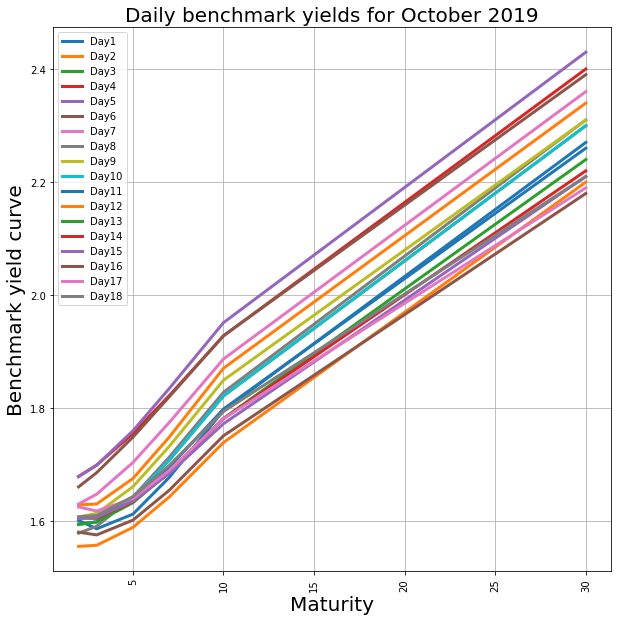

In [200]:
#fit yield curve for november
t = np.array([2, 3, 5, 7, 10, 30])
d = []
for i in range(0, len(Bch_int['2 Yr'])):
    if i > 22:
        y = Bch_int.values[i]
        curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 1.0 for the optimization of tau
        assert status.success
        d.append(curve(t))
        print(curve)
d = pd.Series(d) 
plt.figure(figsize = (10, 10))
                      
plt.plot(t, d[0] , label = 'Day1', linewidth = 3)
plt.plot(t, d[1] , label = 'Day2', linewidth = 3)
plt.plot(t, d[2] , label = 'Day3', linewidth = 3)
plt.plot(t, d[3] , label = 'Day4', linewidth = 3)
plt.plot(t, d[4] , label = 'Day5', linewidth = 3)
plt.plot(t, d[5] , label = 'Day6', linewidth = 3)
plt.plot(t, d[6] , label = 'Day7', linewidth = 3)
plt.plot(t, d[7] , label = 'Day8', linewidth = 3)
plt.plot(t, d[8] , label = 'Day9', linewidth = 3)
plt.plot(t, d[9] , label = 'Day10', linewidth = 3)
plt.plot(t, d[10] , label = 'Day11', linewidth = 3)
plt.plot(t, d[11] , label = 'Day12', linewidth = 3)
plt.plot(t, d[12] , label = 'Day13', linewidth = 3)
plt.plot(t, d[13] , label = 'Day14', linewidth = 3)
plt.plot(t, d[14] , label = 'Day15', linewidth = 3)
plt.plot(t, d[15] , label = 'Day16', linewidth = 3)
plt.plot(t, d[16] , label = 'Day17', linewidth = 3)
plt.plot(t, d[17] , label = 'Day18', linewidth = 3)



plt.grid()

plt.legend()
plt. xticks(rotation = 90, fontsize = 10)
plt. xticks(fontsize = 10)

plt.xlabel('Maturity', fontsize = 20)
plt.ylabel('Benchmark yield curve', fontsize = 20)
plt.title("Daily benchmark yield curve for November 2019", fontsize = 20)

plt.show()



### Significant changes 
The Nelson-Siegel (NS) model provided a good fit for our dataset, we can see that the yields on long term bonds are higher than yields from short term bonds and the changes within the curve has a non parallel shift 